## Sección 12: K vecinos más cercanos en Machine Learning

<details>
<summary><strong>📊 KNN </strong></summary>
<ul>
    <li>Es un <strong>método de clasificación</strong> supervisada, que estima la probabilidad de que un elemento 'x' pertenezca a una clase 'C' a partir de la información proporcionada.</li>
    <li>En el reconocimiento de patrones, este algoritmo es usado como método de clasificación de objetos, basado en un entrenamiento mediante ejemplos cercanos en el espacio de elementos.</li>
    <li>Es sencillo, fácil de entrenar y trabaja con cualquier número de clases.</li>
    <li>Modo de uso:</li>
    <ul>
        <li>1 - Calcula la distancia del círculo "verde" a todos los demás elementos.</li>
        <li>2 - Ordena los puntos en función de la distancia que los separa del verde, de menor a mayor.</li>
        <li>3 - Predice el grupo al que pertenece el círculo "verde" en función de la clase a la que pertenecen los "k" elementos más cercanos.</li>
    </ul>
        
</ul>
    
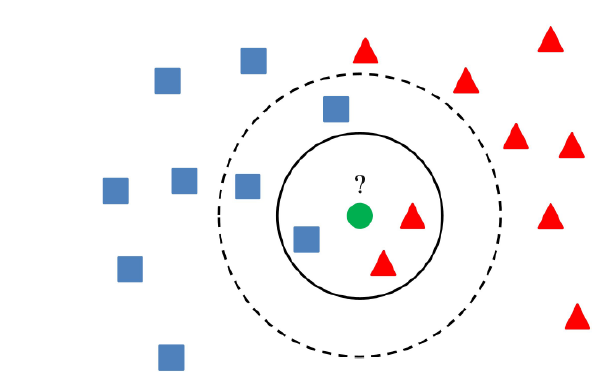
</details>

---
### Ejemplo K vecinos más cercanos

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
cd ../resources/datasets

/home/aramos-m/Escritorio/IBM_AI/resources/datasets


In [6]:
dataframe = pd.read_csv("vehiculos.csv")
dataframe.head()

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio,vehicle_class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,saab
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,bus


In [7]:
dataframe.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr_axis_aspect_ratio', 'max_length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr_axis_rectangularity', 'max_length_rectangularity',
       'scaled_variance_major_axis', 'scaled_variance_minor_axis',
       'scaled_radius_gyration', 'skewness_major_axis', 'skewness_minor_axis',
       'kurtosis_minor_axis', 'kurtosis_major_axis', 'hollows_ratio',
       'vehicle_class'],
      dtype='object')

In [8]:
dataframe["vehicle_class"].unique()

array(['van', 'saab', 'bus', 'opel'], dtype=object)

In [9]:
y = dataframe["vehicle_class"]
y.head()

0     van
1     van
2    saab
3     van
4     bus
Name: vehicle_class, dtype: object

In [10]:
X = dataframe.drop("vehicle_class", axis=1)
X.head()

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [13]:
X_train

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio
794,87.0,41.0,76.0,165.0,67.0,7.0,148.0,45.0,19.0,140.0,171.0,327.0,152.0,72.0,7.0,13.0,188.0,195.0
317,95.0,45.0,105.0,208.0,64.0,10.0,187.0,36.0,22.0,150.0,202.0,520.0,158.0,64.0,7.0,32.0,198.0,211.0
570,105.0,53.0,108.0,206.0,63.0,12.0,222.0,31.0,25.0,168.0,226.0,712.0,201.0,71.0,15.0,35.0,189.0,203.0
750,96.0,40.0,78.0,170.0,58.0,7.0,174.0,38.0,21.0,139.0,197.0,455.0,160.0,68.0,3.0,29.0,191.0,200.0
374,87.0,36.0,53.0,117.0,58.0,4.0,118.0,57.0,17.0,125.0,138.0,205.0,138.0,85.0,9.0,15.0,180.0,183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,91.0,37.0,76.0,138.0,55.0,8.0,132.0,51.0,18.0,135.0,157.0,256.0,124.0,69.0,0.0,12.0,191.0,192.0
607,86.0,39.0,62.0,129.0,59.0,6.0,116.0,57.0,17.0,135.0,137.0,203.0,145.0,64.0,7.0,9.0,199.0,204.0
544,88.0,43.0,70.0,177.0,74.0,19.0,152.0,44.0,19.0,143.0,180.0,342.0,168.0,76.0,1.0,9.0,186.0,189.0
643,95.0,43.0,83.0,198.0,69.0,6.0,177.0,36.0,21.0,139.0,189.0,484.0,163.0,68.0,6.0,4.0,196.0,198.0


In [14]:
X_test

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio
547,88.0,44.0,70.0,151.0,61.0,8.0,143.0,46.0,18.0,143.0,163.0,311.0,173.0,68.0,7.0,8.0,196.0,203.0
694,100.0,43.0,92.0,197.0,62.0,10.0,180.0,36.0,21.0,143.0,200.0,489.0,153.0,64.0,6.0,9.0,195.0,205.0
559,101.0,56.0,101.0,231.0,72.0,10.0,217.0,31.0,24.0,171.0,232.0,698.0,216.0,72.0,2.0,6.0,187.0,197.0
248,103.0,55.0,103.0,211.0,65.0,11.0,212.0,31.0,24.0,165.0,229.0,673.0,249.0,72.0,5.0,16.0,188.0,196.0
720,91.0,38.0,76.0,172.0,61.0,8.0,167.0,40.0,20.0,134.0,196.0,415.0,145.0,71.0,0.0,28.0,189.0,198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,104.0,54.0,91.0,209.0,67.0,11.0,218.0,31.0,24.0,170.0,223.0,697.0,196.0,74.0,4.0,21.0,187.0,196.0
436,93.0,42.0,64.0,123.0,51.0,7.0,135.0,51.0,18.0,144.0,164.0,262.0,155.0,78.0,16.0,12.0,185.0,185.0
735,86.0,37.0,77.0,144.0,54.0,7.0,154.0,43.0,19.0,127.0,179.0,352.0,145.0,71.0,14.0,13.0,186.0,191.0
63,83.0,42.0,66.0,156.0,67.0,7.0,150.0,45.0,19.0,144.0,174.0,333.0,159.0,78.0,4.0,2.0,182.0,188.0


In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1) 

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [44]:
predicciones = knn.predict(X_test)
predicciones

array(['bus', 'bus', 'opel', 'opel', 'saab', 'van', 'saab', 'saab',
       'saab', 'van', 'opel', 'bus', 'opel', 'saab', 'opel', 'van',
       'opel', 'saab', 'bus', 'saab', 'bus', 'bus', 'bus', 'bus', 'bus',
       'van', 'opel', 'saab', 'bus', 'bus', 'opel', 'van', 'bus', 'saab',
       'opel', 'bus', 'opel', 'bus', 'bus', 'van', 'van', 'opel', 'opel',
       'bus', 'saab', 'van', 'bus', 'bus', 'van', 'bus', 'bus', 'saab',
       'opel', 'van', 'van', 'bus', 'saab', 'bus', 'saab', 'opel', 'van',
       'van', 'bus', 'bus', 'opel', 'van', 'bus', 'bus', 'van', 'van',
       'van', 'bus', 'opel', 'van', 'opel', 'van', 'saab', 'saab', 'bus',
       'bus', 'bus', 'bus', 'saab', 'van', 'bus', 'bus', 'saab', 'saab',
       'saab', 'van', 'van', 'van', 'van', 'saab', 'saab', 'saab', 'saab',
       'opel', 'saab', 'saab', 'bus', 'bus', 'bus', 'opel', 'van', 'bus',
       'bus', 'opel', 'van', 'van', 'van', 'bus', 'opel', 'bus', 'opel',
       'opel', 'opel', 'van', 'opel', 'opel', 'bus', 'ope

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicciones))

[[65  0  7  5]
 [ 7 24 28  6]
 [ 5 26 23  3]
 [ 2  0  2 51]]


In [64]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

         bus       0.77      0.88      0.82        77
        opel       0.58      0.45      0.50        65
        saab       0.44      0.39      0.41        57
         van       0.82      0.98      0.89        55

    accuracy                           0.68       254
   macro avg       0.65      0.67      0.66       254
weighted avg       0.66      0.68      0.66       254



In [66]:
# Probamos diferentes valores de k para encontrar el que ofrece mejor rendimiento en el modelo KNN

tasa_error = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    prediccion_i = knn.predict(X_test)
    tasa_error.append(np.mean(prediccion_i != y_test))

In [68]:
tasa_error

[0.35826771653543305,
 0.3464566929133858,
 0.3188976377952756,
 0.3228346456692913,
 0.33858267716535434,
 0.3346456692913386,
 0.3228346456692913,
 0.33858267716535434,
 0.36220472440944884,
 0.3661417322834646,
 0.35039370078740156,
 0.3661417322834646,
 0.36220472440944884,
 0.38188976377952755,
 0.35039370078740156,
 0.3661417322834646,
 0.3661417322834646,
 0.3700787401574803,
 0.3661417322834646,
 0.3779527559055118,
 0.3661417322834646,
 0.3700787401574803,
 0.37401574803149606,
 0.37401574803149606,
 0.3779527559055118,
 0.38976377952755903,
 0.38188976377952755,
 0.3700787401574803,
 0.37401574803149606]

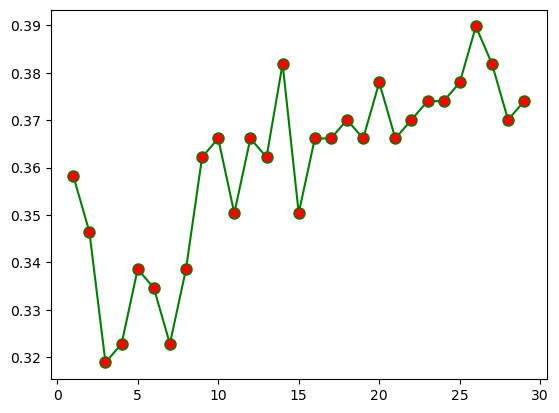

In [70]:
valores = range(1,30)
plt.plot(valores, tasa_error, color="g", marker='o', markerfacecolor="red", markersize=8)

In [78]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
predicciones = knn.predict(X_test)

In [82]:
print(confusion_matrix(y_test, predicciones))

[[68  2  5  2]
 [ 8 29 23  5]
 [11 19 22  5]
 [ 1  0  0 54]]


In [80]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

         bus       0.77      0.88      0.82        77
        opel       0.58      0.45      0.50        65
        saab       0.44      0.39      0.41        57
         van       0.82      0.98      0.89        55

    accuracy                           0.68       254
   macro avg       0.65      0.67      0.66       254
weighted avg       0.66      0.68      0.66       254

